<a href="https://colab.research.google.com/github/Benza1611/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

##Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##Explore Data

In [3]:
X.shape

(500, 2)

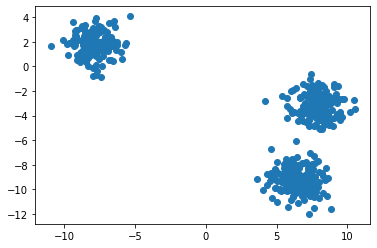

In [5]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##Clustering

###import

In [6]:
from sklearn.cluster import KMeans

###Define

In [7]:
kmeans = KMeans(n_clusters=2, random_state=6)

###Fit-Predict

In [10]:
y_clust = kmeans.fit_predict(X)

In [11]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

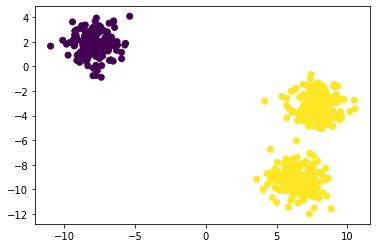

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

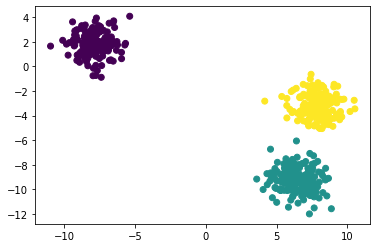

In [13]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

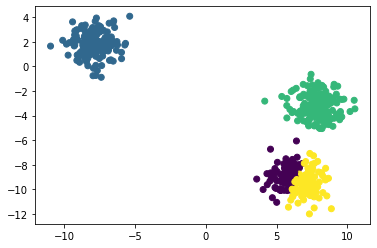

In [14]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

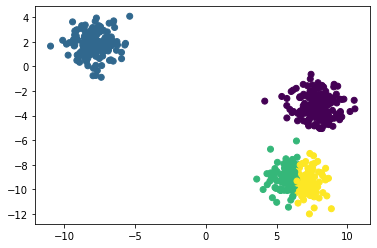

In [17]:
#define
kmeans = KMeans(n_clusters=4, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

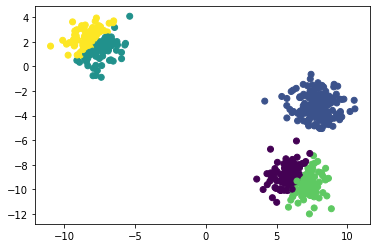

In [18]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

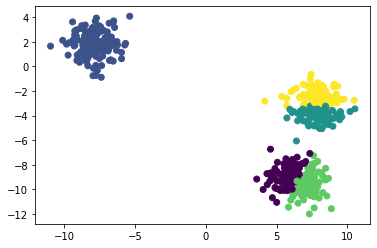

In [19]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

#Exanple Application (Color Quantization)

In [20]:
import cv2
import os

In [21]:
img = cv2.imread('/content/3683.jpg')

In [22]:
img.shape

(1200, 1200, 3)

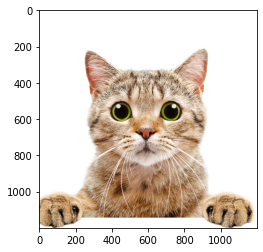

In [23]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###นับจำนวนสี

In [24]:
import numpy as np

In [25]:
np.unique(np.reshape(RGB_img, (RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(89230, 3)

###จัดกลุ่มให้เหลือ 16 สี

In [27]:
myquantize = KMeans(n_clusters=16, random_state=6)

###แปลงข้อมูลให้อยู่ในรูป row-column

In [28]:
img_row = np.reshape(RGB_img, (RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(1440000, 3)

In [29]:
final_color = myquantize.fit_predict(img_row)

###ใช้ centroid เป็นตัวแทนของสี

In [30]:
centroid = myquantize.cluster_centers_

In [31]:
centroid

array([[254.93647342, 254.88801745, 254.79080653],
       [176.09969085, 128.52403782,  86.17724808],
       [226.09782572, 201.56240607, 177.66180154],
       [155.53149674, 104.60616203,  59.90940039],
       [ 24.94560916,  14.92892288,   8.15333191],
       [193.88855523, 167.03607222, 144.24387223],
       [247.15054784, 235.367658  , 222.9410844 ],
       [150.29768347, 115.50966262,  86.26985512],
       [106.41537112,  69.58101421,  33.5197754 ],
       [190.69331767, 153.88297585, 120.88491276],
       [236.59985739, 217.69338395, 198.9660429 ],
       [ 72.20006706,  44.42120264,  20.94752431],
       [216.08780412, 177.86434217, 139.00316132],
       [172.7307099 , 138.68025613, 109.98620727],
       [128.4376503 ,  89.17257964,  54.65551623],
       [210.27586026, 185.43279923, 163.39959723]])

###แทนสีคืนลงไป

In [32]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

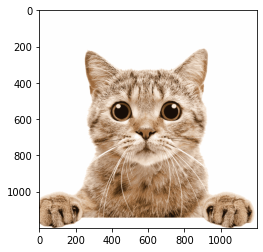

In [33]:
plt.imshow(new_img/255)

In [34]:
plt.imsave('img.jpg',new_img/255)

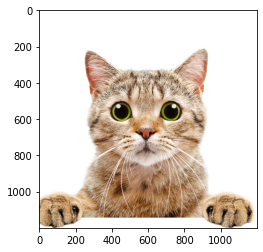

In [35]:
plt.imshow(RGB_img)